<a href="https://colab.research.google.com/github/mtran14/AUglove/blob/main/avec_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
label_file = "/content/drive/MyDrive/AVEC_Challenge_Packed/labels/Detailed_PHQ8_Labels.csv"
train_file = "/content/drive/MyDrive/AVEC_Challenge_Packed/labels/train_split.csv"
dev_file = "/content/drive/MyDrive/AVEC_Challenge_Packed/labels/dev_split.csv"
test_file = "/content/drive/MyDrive/AVEC_Challenge_Packed/labels/test_split.csv"

In [ ]:
import pandas as pd
distance_threshold = 1.75

freq_threshold = 150
data_freq = pd.read_csv("/content/drive/MyDrive/cluster_counter_1000.csv", header=None).values
unk_clusters = []
for i in range(data_freq.shape[0]):
    if(data_freq[i][1] <= freq_threshold):
        unk_clusters.append(i)

In [ ]:
import pandas as pd

data_train = pd.read_csv(train_file).values[:,0]
data_val = pd.read_csv(dev_file).values[:,0]
data_test = pd.read_csv(test_file).values[:,0]
pid = list(data_train) + list(data_test) + list(data_val)
print(pid)

[302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 318, 319, 322, 323, 324, 325, 326, 327, 328, 329, 330, 332, 333, 335, 337, 338, 339, 340, 341, 345, 346, 348, 349, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 366, 367, 368, 369, 370, 372, 375, 376, 377, 378, 379, 380, 383, 384, 385, 386, 387, 389, 390, 391, 392, 395, 396, 397, 399, 400, 403, 404, 405, 406, 407, 409, 410, 411, 413, 414, 416, 417, 418, 419, 420, 421, 422, 424, 426, 427, 428, 429, 430, 432, 434, 436, 438, 439, 440, 443, 444, 445, 446, 447, 449, 450, 452, 453, 456, 457, 458, 459, 461, 462, 463, 464, 466, 467, 469, 470, 471, 472, 474, 476, 477, 478, 481, 482, 483, 485, 487, 488, 489, 490, 491, 492, 601, 603, 608, 612, 628, 633, 641, 654, 660, 662, 673, 677, 680, 684, 692, 695, 697, 702, 703, 707, 600, 602, 604, 605, 606, 607, 609, 615, 618, 619, 620, 622, 623, 624, 625, 626, 629, 631, 634, 635, 636, 637, 638, 640, 649, 650, 651, 652, 655, 656, 658, 659, 661, 663, 664, 666, 669,

In [ ]:
data_test

array([600, 602, 604, 605, 606, 607, 609, 615, 618, 619, 620, 622, 623,
       624, 625, 626, 629, 631, 634, 635, 636, 637, 638, 640, 649, 650,
       651, 652, 655, 656, 658, 659, 661, 663, 664, 666, 669, 676, 679,
       682, 683, 688, 689, 691, 693, 696, 699, 705, 708, 709, 710, 712,
       715, 716, 717, 718], dtype=object)

In [ ]:
import pandas as pd

data_dict = {}

maxlen = 50000

for row in pd.read_csv("/content/drive/MyDrive/avec_info1000.csv", header=None).values:
  current_file_name = row[0]
  participant_id = int(current_file_name.split("_VIDEO.csv")[0])

  string_data = row[1]
  string_data = string_data.replace('\n','')
  tokens = string_data.split()
  assert len(tokens) % 2 == 0
  text_part = tokens[0:len(tokens)//2]
  distances_part = tokens[len(tokens)//2:len(tokens)]
  current_str = ''
  for i in range(min(len(text_part), maxlen)):
      current_token = text_part[i]
      current_distance = float(distances_part[i])
      if(current_distance <= distance_threshold):
          current_cluster_in_int = int(current_token[1:])
          if(current_cluster_in_int not in unk_clusters):
              current_str += current_token + ' '
          else:
              current_str += '<unk> '
      else:
          current_str += '<unk> '
  current_str = current_str.strip()
  data_dict[participant_id] = current_str

In [ ]:
import pandas as pd
phq_dict = {}
phq_data = pd.read_csv(label_file).values
for row in phq_data:
  phq_dict[row[0]] = row[9]

healthy = []
unhealthy = []
all = []
all_scores = []
maxlen = 5000
for row in pd.read_csv(train_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    # train_data.append(data_dict[current_id])
    # train_label.append(current_label)
    percent_unk = data_dict[current_id].split().count("<unk>")/len(data_dict[current_id].split())
    # dev_label.append(current_label)
    # if(current_label == 1):
    #   unhealthy.append(percent_unk)
    # else:
    #   healthy.append(percent_unk)
    all.append(percent_unk)
    all_scores.append(current_label)
  except:
    continue

for row in pd.read_csv(test_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    # test_data.append(data_dict[current_id])
    # test_label.append(current_label)
    # test_ids.append(current_id)
    percent_unk = data_dict[current_id].split().count("<unk>")/len(data_dict[current_id].split())
    # dev_label.append(current_label)
    # if(current_label == 1):
    #   unhealthy.append(percent_unk)
    # else:
    #   healthy.append(percent_unk)
    all.append(percent_unk)
    all_scores.append(current_label)
  except:
    continue

for row in pd.read_csv(dev_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   test_data.append(current_string[i:i+maxlen])
    #   test_label.append(current_label)
    #   test_ids.append([current_id, current_label])
    # dev_data.append(data_dict[current_id])
    percent_unk = data_dict[current_id].split().count("<unk>")/len(data_dict[current_id].split())
    # dev_label.append(current_label)
    # if(current_label == 1):
    #   unhealthy.append(percent_unk)
    # else:
    #   healthy.append(percent_unk)
    all.append(percent_unk)
    all_scores.append(current_label)
  except:
    continue

In [ ]:
import numpy as np

bins = list(range(0,24,3))
output_all = []
output_score_avg = []
for i in range(len(bins)-1):
  current_start = bins[i]
  output_local = []
  current_scores_all = []
  current_end = bins[i+1]
  for j in range(len(all_scores)):
    if(all_scores[j] >= current_start and all_scores[j] <= current_end):
      output_local.append(all[j])
      current_scores_all.append(all_scores[j])
  output_all.append(np.mean(output_local))
  output_score_avg.append(np.mean(current_scores_all))
  print(i, "Support Count: ", len(output_local))
print("Len output: ", len(output_all))

0 Support Count:  99
1 Support Count:  51
2 Support Count:  47
3 Support Count:  40
4 Support Count:  25
5 Support Count:  23
6 Support Count:  16
Len output:  7


In [ ]:
pd.read_csv("avec_info1000.csv", header=None).values[0:10]

array([['1144_VIDEO.csv',
        'c627 c627 c627 c769 c769 c627 c769 c769 c627 c627 c509 c509 c899 c899 c709 c783 c709 c783 c288 c137 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c709 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c23 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c709 c709 c509 c509 c509 c509 c509 c509 c355 c509 c509 c509 c709 c509 c910 c707 c707 c707 c707 c789 c676 c676 c509 c509 c509 c509 c23 c509 c509 c509 c509 c509 c509 c509 c644 c509 c509 c509 c509 c509 c509 c509 c509 c676 c509 c509 c509 c509 c509 c509 c509 c509 c509 c509 c619 c619 c619 c619 c619 c619 c149 c8 c899 c899 c899 c899 c660 c899 c965 c899 c769 c899 c899 c778 c899 c965 c965 c106 c965 c965 c965 c49 c899 c899 c619 c965 c149 c149 c149 c965 c965 c965 c149 c965 c965 c149 c149 c965 c627 c965 c627 c899 c899 c899 c899 c899 c899 c778 c899 c858 c899 c398 c899 c899 c398 c398 c899 c899 c398 c899 c899 c778 c899 c899 c899 c899 

58 190


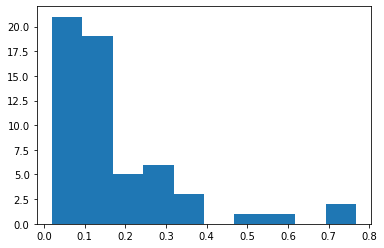

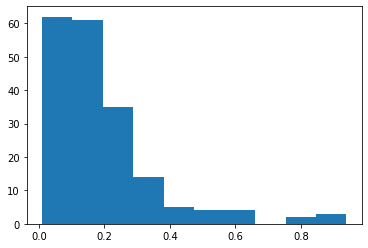

In [ ]:
import matplotlib.pyplot as plt

print(len(unhealthy), len(healthy))
plt.hist(unhealthy, bins=10)
plt.show()

plt.hist(healthy, bins=10)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import rankdata, tiecorrect
from scipy.stats import distributions

def mannwhitneyu(x, y, use_continuity=True, alternative=None):

    x = np.asarray(x)
    y = np.asarray(y)
    n1 = len(x)
    n2 = len(y)
    ranked = rankdata(np.concatenate((x, y)))
    rankx = ranked[0:n1]  # get the x-ranks
    u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0)  # calc U for x
    u2 = n1*n2 - u1  # remainder is U for y
    T = tiecorrect(ranked)
    if T == 0:
        raise ValueError('All numbers are identical in mannwhitneyu')
    sd = np.sqrt(T * n1 * n2 * (n1+n2+1) / 12.0)

    meanrank = n1*n2/2.0 + 0.5 * use_continuity
    if alternative is None or alternative == 'two-sided':
        bigu = max(u1, u2)
    elif alternative == 'less':
        bigu = u1
    elif alternative == 'greater':
        bigu = u2
    else:
        raise ValueError("alternative should be None, 'less', 'greater' "
                         "or 'two-sided'")

    z = (bigu - meanrank) / sd
    if alternative is None:
        # This behavior, equal to half the size of the two-sided
        # p-value, is deprecated.
        p = distributions.norm.sf(abs(z))
    elif alternative == 'two-sided':
        p = 2 * distributions.norm.sf(abs(z))
    else:
        p = distributions.norm.sf(z)

    u = u2
    # This behavior is deprecated.
    if alternative is None:
        u = min(u1, u2)
    return z, u, p

In [ ]:
from scipy import stats
import numpy as np
from numpy import std, mean, sqrt

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

print('Healthy: ', np.mean(healthy), 'Depression: ', np.mean(unhealthy))
# print(mannwhitneyu(schz, healthy), stats.ranksums(schz, healthy), cohen_d(schz, healthy))

z, u, p = mannwhitneyu(unhealthy, healthy)
#PL: Healthy:  0.01658695875267761 Schizophrenia:  0.01322219167011748
# Ttest_indResult(statistic=-2.192412251164359, pvalue=0.02850080954293128) -0.12032544401911159
#OT: 
n_obs = len(unhealthy) + len(healthy)
effect_size = z / sqrt(n_obs)
print(p, effect_size, n_obs)

Healthy:  0.1927951161734384 Depression:  0.16987648047372714
0.09436707211188716 0.08346023319380316 248


In [ ]:
import pandas as pd
phq_dict = {}
phq_data = pd.read_csv(label_file).values
for row in phq_data:
  phq_dict[row[0]] = row[9]

train_data, train_label = [], []
test_data, test_label, test_ids = [], [], []
dev_data, dev_label = [], []
maxlen = 5000
for row in pd.read_csv(train_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    train_data.append(data_dict[current_id])
    train_label.append(current_label)
  except:
    continue

for row in pd.read_csv(test_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    test_data.append(data_dict[current_id])
    test_label.append(current_label)
    test_ids.append(current_id)
  except:
    continue

for row in pd.read_csv(dev_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   test_data.append(current_string[i:i+maxlen])
    #   test_label.append(current_label)
    #   test_ids.append([current_id, current_label])
    dev_data.append(data_dict[current_id])
    dev_label.append(current_label)
  except:
    continue

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import pearsonr
def ccc(y_true, y_pred):
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

distribution = np.zeros((27,1))
for val in train_label:
  distribution[val] += 1
distribution /= distribution.sum()

scores = []
n_iter = 1000

for x in range(n_iter):
  pred_test = []
  test_label = np.array(test_label).reshape(-1,1)
  for i in range(test_label.shape[0]):
    pred_test.append(np.random.choice(np.arange(0, 27), p=list(distribution.reshape(-1,))))
  current_rmse = mean_squared_error(test_label, pred_test, squared=False)
  current_pcc, p_val = pearsonr(np.array(pred_test, dtype=float).reshape(-1,), np.array(test_label, dtype=float).reshape(-1,))
  current_ccc = ccc(np.array(test_label, dtype=float).reshape(-1,), np.array(pred_test, dtype=float).reshape(-1,))
  # print(current_rmse, current_pcc, current_ccc)
  scores.append([current_rmse, abs(current_pcc), abs(current_ccc)])
scores = np.array(scores)
print(np.mean(scores, axis=0))

[8.96002464 0.11387961 0.10759554]


In [ ]:
scores

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import pandas as pd
import numpy as np

maxlen = maxlen
batch_size = 8

print(len(train_data), 'train sequences')
print(len(dev_data), 'dev sequences')
print(len(test_data), 'test sequences')

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

t = Tokenizer()
t.fit_on_texts(train_data)
vocab_size = len(t.word_index) + 1
sequences_train = t.texts_to_sequences(train_data)
sequences_dev = t.texts_to_sequences(dev_data)
sequences_test = t.texts_to_sequences(test_data)

147 train sequences
51 dev sequences
50 test sequences


In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
maxlen = 500
datatrain = pad_sequences(sequences_train, maxlen=maxlen*6)[:,::6]
datatest = pad_sequences(sequences_test, maxlen=maxlen*6)[:,::6]
datadev = pad_sequences(sequences_dev, maxlen=maxlen*6)[:,::6]
# datatest = pad_sequences(sequences_test, maxlen=maxlen)
# datadev = pad_sequences(sequences_dev, maxlen=maxlen)

# labels_train = to_categorical(np.asarray(train_label))
# labels_test = to_categorical(np.asarray(test_label))
# labels_dev = to_categorical(np.asarray(dev_label))
scaler = MinMaxScaler((-1,1)).fit(np.array(train_label).reshape(-1,1))
train_label_norm = scaler.transform(np.array(train_label).reshape(-1,1))
test_label_norm = scaler.transform(np.array(test_label).reshape(-1,1))
dev_label_norm = scaler.transform(np.array(dev_label).reshape(-1,1))
word2ind_data = pd.read_csv("/content/drive/MyDrive/word2ind_1000.csv", header=None).values
ind2word = {}
for i in range(word2ind_data.shape[0]):
  current_row = word2ind_data[i]
  ind2word[current_row[1]] = current_row[0]

embeddings_index = dict()
data_embed = pd.read_csv("/content/drive/MyDrive/glove_embeddings_100_1000cluster_v2.csv", header=None).values
for i in range(data_embed.shape[0]):
    word = ind2word[i]
    coefs = data_embed[i]
    embeddings_index[word] = coefs
emb_size = data_embed.shape[1]
from numpy import zeros

print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, emb_size))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

Loaded 789 word vectors.


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, Dropout
from keras.datasets import imdb
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import tensorflow_probability as tfp
from scipy.stats import pearsonr

def ccc(y_true, y_pred):
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

early_stopping_monitor = EarlyStopping(
      monitor = 'val_loss',
      min_delta = 0,
      patience = 20,
      verbose = 1,
      mode = 'auto',
      baseline=None,
      restore_best_weights=True
    )
from numpy.random import seed
batch_size = 8
seeds = list(np.random.choice(10000, size=50, replace=False))

train_label = np.array(train_label)
test_label = np.array(test_label)
dev_label = np.array(dev_label)

dev_correlation = []
dev_mse = []
test_scores = []
for mseed in seeds:
  seed(mseed)
  tf.random.set_seed(mseed)

  model = Sequential()
  model.add(Embedding(vocab_size, 25, input_length=maxlen))
  # model.add(Embedding(vocab_size, emb_size, weights=[embedding_matrix], input_length=maxlen, trainable=True))
  model.add(Bidirectional(LSTM(32, dropout=0.4)))
  # model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  # model.add(BatchNormalization())
  model.add(Dense(1))

  opt = tf.optimizers.Adam(lr=1e-3)
  model.compile(loss='mse', optimizer='adam')
  model.fit(datatrain, train_label_norm, batch_size=batch_size, validation_data=(datadev, dev_label_norm), epochs=20, verbose=0, callbacks=[early_stopping_monitor])

  #===============================
  y_pred = model(datadev).numpy()
  y_pred = np.array(y_pred, dtype=float).reshape(-1,)
  dev_label_norm = np.array(dev_label_norm, dtype=float).reshape(-1,)
  pccd, pval = pearsonr(y_pred, dev_label_norm)
  maed = mean_absolute_error(dev_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,))
  rmsed = mean_squared_error(dev_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,), squared=False)
  concordanced = ccc(y_pred, dev_label_norm)
  # print("Dev set: ", pccd, concordanced, maed, rmsed)
  #===============================
  y_pred = model(datatest).numpy()
  y_pred = np.array(y_pred, dtype=float).reshape(-1,)
  test_label_norm = np.array(test_label_norm, dtype=float).reshape(-1,)
  pcc, pval = pearsonr(y_pred, test_label_norm)
  mae = mean_absolute_error(test_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,))
  rmse = mean_squared_error(test_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,), squared=False)
  concordance = ccc(y_pred, test_label_norm)
  # print(abs(pcc), abs(concordance), mae, rmse)
  # dev_ccc.append(abs(concordanced))
  dev_correlation.append(abs(pcc))
  dev_mse.append(rmse)
  test_scores.append([abs(pcc), abs(concordance), mae, rmse])
best_model_ind = dev_correlation.index(max(dev_correlation))
print(test_scores[best_model_ind])

[0.15682088554731913, 0.11952285584306002, 6.307669427879155, 7.881896518221986]


In [ ]:
dev_correlation_abs = list(np.abs(dev_correlation))
print(test_scores[dev_correlation_abs.index(max(dev_correlation_abs))])

[0.15791537349882562, 0.12115955677221484, 6.333420970328152, 7.87851159346684]


In [ ]:
import pandas as pd
phq_dict = {}
phq_data = pd.read_csv(label_file).values
for row in phq_data:
  phq_dict[row[0]] = row[9]

train_data, mtrain_label = [], []
test_data, mtest_label, test_ids = [], [], []
dev_data, mdev_label = [], []
maxlen = 5000
for row in pd.read_csv(train_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    train_data.append(data_dict[current_id])
    mtrain_label.append(current_label)
  except:
    continue

for row in pd.read_csv(test_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    test_data.append(data_dict[current_id])
    mtest_label.append(current_label)
    test_ids.append(current_id)
  except:
    continue

for row in pd.read_csv(dev_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   test_data.append(current_string[i:i+maxlen])
    #   test_label.append(current_label)
    #   test_ids.append([current_id, current_label])
    dev_data.append(data_dict[current_id])
    mdev_label.append(current_label)
  except:
    continue

In [ ]:
maxlen = 500
batch_size = 8

# print(len(train_data), 'train sequences')
# print(len(dev_data), 'dev sequences')
# print(len(test_data), 'test sequences')

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, Dropout
from keras.datasets import imdb
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import tensorflow_probability as tfp
from scipy.stats import pearsonr

datatrain = pad_sequences(train_data, maxlen=maxlen*6, dtype='float32')[:,::6]
datatest = pad_sequences(test_data, maxlen=maxlen*6, dtype='float32')[:,::6]
datadev = pad_sequences(dev_data, maxlen=maxlen*6, dtype='float32')[:,::6]

scaler = MinMaxScaler((-1,1)).fit(np.array(mtrain_label).reshape(-1,1))
mtrain_label_norm = scaler.transform(np.array(mtrain_label).reshape(-1,1))
mtest_label_norm = scaler.transform(np.array(mtest_label).reshape(-1,1))
mdev_label_norm = scaler.transform(np.array(mdev_label).reshape(-1,1))

from sklearn.preprocessing import StandardScaler

early_stopping_monitor = EarlyStopping(
      monitor = 'val_loss',
      min_delta = 0,
      patience = 20,
      verbose = 1,
      mode = 'auto',
      baseline=None,
      restore_best_weights=True
    )

# scalerd = StandardScaler()
num_instances, num_time_steps, num_features = datatrain.shape
# datatrain = np.reshape(datatrain, (-1, num_features))
# datatrain = scalerd.fit_transform(datatrain)
# datatrain = np.reshape(datatrain, (num_instances, num_time_steps, num_features))

# num_instances, num_time_steps, num_features = datatest.shape
# datatest = np.reshape(datatest, (-1, num_features))
# datatest = scalerd.transform(datatest)
# datatest = np.reshape(datatest, (num_instances, num_time_steps, num_features))

# num_instances, num_time_steps, num_features = datadev.shape
# datadev = np.reshape(datadev, (-1, num_features))
# datadev = scalerd.transform(datadev)
# datadev = np.reshape(datadev, (num_instances, num_time_steps, num_features))

from numpy.random import seed
batch_size = 8
seeds = list(np.random.choice(10000, size=50, replace=False))

dev_ccc = []
test_scores = []
for mseed in seeds:
  seed(mseed)
  tf.random.set_seed(mseed)

  model = Sequential()
  # model.add(Embedding(vocab_size, 100, input_length=maxlen))
  # model.add(Embedding(vocab_size, emb_size, weights=[embedding_matrix], input_length=maxlen, trainable=True))
  model.add(Bidirectional(LSTM(32, dropout=0.4, input_shape=(num_time_steps, num_features))))
  # model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  # model.add(BatchNormalization())
  model.add(Dense(1))

  opt = tf.optimizers.Adam(lr=1e-3)
  model.compile(loss='mse', optimizer='adam')
  model.fit(datatrain, mtrain_label_norm, batch_size=batch_size, validation_data=(datadev, mdev_label_norm), epochs=20, verbose=0, callbacks=[early_stopping_monitor])
  mdev_label = np.array(mdev_label)
  mtest_label = np.array(mtest_label)
  #===============================
  y_pred = model(datadev).numpy()
  y_pred = np.array(y_pred, dtype=float).reshape(-1,)
  mdev_label_norm = np.array(mdev_label_norm, dtype=float).reshape(-1,)
  pccd, pval = pearsonr(y_pred, mdev_label_norm)
  maed = mean_absolute_error(mdev_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,))
  rmsed = mean_squared_error(mdev_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,), squared=False)
  concordanced = ccc(y_pred, mdev_label_norm)
  # print("Dev set: ", pccd, concordanced, maed, rmsed)
  #===============================
  y_pred = model(datatest).numpy()
  y_pred = np.array(y_pred, dtype=float).reshape(-1,)
  mtest_label_norm = np.array(mtest_label_norm, dtype=float).reshape(-1,)
  pcc, pval = pearsonr(y_pred, mtest_label_norm)
  mae = mean_absolute_error(mtest_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,))
  rmse = mean_squared_error(mtest_label.reshape(-1,), scaler.inverse_transform(y_pred.reshape(-1,1)).reshape(-1,), squared=False)
  concordance = ccc(y_pred, mtest_label_norm)
  # print(abs(pcc), abs(concordance), mae, rmse)
  # dev_ccc.append(abs(concordanced))
  dev_ccc.append(abs(concordanced))
  test_scores.append([abs(pcc), abs(concordance), mae, rmse])
best_model_ind = dev_ccc.index(max(dev_ccc))
print(test_scores[best_model_ind])


[0.09619279571482416, 0.07778362794225285, 7.059840088375868, 8.405554346726401]


In [ ]:
datatrain.shape

(95, 50, 512)

In [ ]:
datadev.shape

(31, 50, 512)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

datatrain = pad_sequences(sequences_train, maxlen=maxlen)
datatest = pad_sequences(sequences_test, maxlen=maxlen)
datadev = pad_sequences(sequences_dev, maxlen=maxlen)

# labels_train = to_categorical(np.asarray(train_label))
# labels_test = to_categorical(np.asarray(test_label))
# labels_dev = to_categorical(np.asarray(dev_label))
scaler = MinMaxScaler().fit(np.array(train_label).reshape(-1,1))
train_label = scaler.transform(np.array(train_label).reshape(-1,1))
test_label = scaler.transform(np.array(test_label).reshape(-1,1))
dev_label = scaler.transform(np.array(dev_label).reshape(-1,1))
word2ind_data = pd.read_csv("/content/drive/MyDrive/word2ind_1000.csv", header=None).values
ind2word = {}
for i in range(word2ind_data.shape[0]):
  current_row = word2ind_data[i]
  ind2word[current_row[1]] = current_row[0]

embeddings_index = dict()
data_embed = pd.read_csv("/content/drive/MyDrive/glove_embeddings_25_1000cluster.csv", header=None).values
for i in range(data_embed.shape[0]):
    word = ind2word[i]
    coefs = data_embed[i]
    embeddings_index[word] = coefs
emb_size = data_embed.shape[1]
from numpy import zeros

print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, emb_size))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout  
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow_probability as tfp
import random

def tf_pearson(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return abs(tfp.stats.correlation(y_true, y_pred))

def tf_pearson_loss(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return 1 - abs(tfp.stats.correlation(y_true, y_pred))

def correlationMetric(x, y, axis=-1):
  """Metric returning the Pearson correlation coefficient of two tensors over some axis, default -2."""
  x = tf.convert_to_tensor(x)
  y = K.cast(y, x.dtype)
  n = tf.cast(tf.shape(x)[axis], x.dtype)
  xsum = tf.reduce_sum(x, axis=axis)
  ysum = tf.reduce_sum(y, axis=axis)
  xmean = xsum / n
  ymean = ysum / n
  xvar = tf.reduce_sum( tf.math.squared_difference(x, xmean), axis=axis)
  yvar = tf.reduce_sum( tf.math.squared_difference(y, ymean), axis=axis)
  cov = tf.reduce_sum( (x - xmean) * (y - ymean), axis=axis)
  corr = cov / tf.sqrt(xvar * yvar)

  ccc_num = 2*corr*tf.math.sqrt(xvar)*tf.math.sqrt(yvar)
  ccc_den = xvar + yvar + tf.math.squared_difference(xmean, ymean)

  # return  tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den
  return  tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den

def correlationLoss(x,y, axis=-1):
  """Loss function that maximizes the pearson correlation coefficient between the predicted values and the labels,
  while trying to have the same mean and variance"""
  x = tf.convert_to_tensor(x)
  y = K.cast(y, x.dtype)
  n = tf.cast(tf.shape(x)[axis], x.dtype)
  xsum = tf.reduce_sum(x, axis=axis)
  ysum = tf.reduce_sum(y, axis=axis)
  xmean = xsum / n
  ymean = ysum / n
  xsqsum = tf.reduce_sum( tf.math.squared_difference(x, xmean), axis=axis) #std x
  ysqsum = tf.reduce_sum( tf.math.squared_difference(y, ymean), axis=axis)  #std y

  cov = tf.reduce_sum( (x - xmean) * (y - ymean), axis=axis)
  corr = cov / tf.sqrt(xsqsum * ysqsum)
  mse = tf.reduce_sum( tf.math.squared_difference(x, y), axis=axis)
  # absdif = tmean(tf.abs(x - y), axis=axis) / tf.sqrt(yvar)
  sqdif = tf.reduce_sum(tf.math.squared_difference(x, y), axis=axis) / n / tf.sqrt(ysqsum / n)
  
  ccc_num = 2*corr*tf.math.sqrt(xsqsum)*tf.math.sqrt(ysqsum)
  ccc_den = xsqsum + ysqsum + tf.math.squared_difference(xmean, ymean)
  # meandif = tf.abs(xmean - ymean) / tf.abs(ymean)
  # vardif = tf.abs(xvar - yvar) / yvar
  # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - corr + (meandif * 0.01) + (vardif * 0.01)) , dtype=tf.float32 )
  # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den + (0.01 * sqdif)) , dtype=tf.float32 )
  # return tf.convert_to_tensor( 1 - ccc_num/ccc_den)
  # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den + (0.01 * sqdif)) , dtype=tf.float32 )
  return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den + (0.01 * sqdif)) , dtype=tf.float32 )


from numpy.random import seed
# mseed = 123
mseed = 123

best_ccc_ = 0
best_seed = 100
for mseed in range(15):
  mseed = random.randint(0,1000)
  seed(mseed)
  tf.random.set_seed(mseed)

  early_stopping_monitor = EarlyStopping(
      monitor = 'val_correlationMetric',
      min_delta = 0,
      patience = 0,
      verbose = 0,
      mode = 'auto',
      baseline=None,
      restore_best_weights=True
  )

  def root_mean_squared_error(y_true, y_pred):
          return K.sqrt(K.mean(K.square(y_pred - y_true))) 

  #tf.keras.metrics.AUC()
  # sample_weight = np.ones(shape=(len(train_label),))
  # sample_weight[train_label == 1] = 4

  model = Sequential()
  # model.add(Embedding(vocab_size, 64, input_length=maxlen))
  model.add(Embedding(vocab_size, emb_size, weights=[embedding_matrix], input_length=maxlen, trainable=True))
  # model.add(Bidirectional(LSTM(32, return_sequences=True)))
  # model.add(Dropout(0.1))
  model.add(Bidirectional(LSTM(50)))
  # model.add(Dropout(0.1))
  # model.add(Dense(32, activation='sigmoid'))
  # model.add(Dropout(0.1))
  model.add(Dense(1, activation='sigmoid'))
  # model.compile(loss='binary_crossentropy', optimizer='adam', weighted_metrics=["accuracy"])

  import keras

  optimizer = keras.optimizers.Adam(lr=5e-4)

  # model.compile(loss='mse', optimizer='adam')
  # model.compile(loss='mse', optimizer='adam')
  model.compile(loss=tf_pearson_loss, optimizer='adam')

  # model.fit(datatrain, np.array(y_train), epochs=5, batch_size=4, validation_split=0.25, callbacks=[TestCallback((datatest, np.array(y_test)))])
  model.fit(datatrain, np.array(train_label), epochs=20, batch_size=1, validation_data=(datadev, np.array(dev_label)), callbacks=[early_stopping_monitor], verbose=1)
  model.fit(datatrain, np.array(train_label), epochs=20, batch_size=15, validation_data=(datadev, np.array(dev_label)), callbacks=[early_stopping_monitor], verbose=0)
  pred_test = model.predict(datatest)
  pred_dev = model.predict(datadev)
  pred_test_inverse = scaler.inverse_transform(pred_test)
  pred_dev_inverse = scaler.inverse_transform(pred_dev)
  test_ccc = abs(concordance_correlation_coefficient(pred_test.reshape(-1), test_label.reshape(-1)))
  dev_ccc = abs(concordance_correlation_coefficient(pred_dev.reshape(-1), dev_label.reshape(-1)))
  # if(test_ccc + dev_ccc > best_ccc_ or dev_ccc > test_ccc):
  best_ccc_ = test_ccc + dev_ccc
  mse_test = mean_squared_error(scaler.inverse_transform(test_label),scaler.inverse_transform(pred_test),squared=False)
  mse_dev = mean_squared_error(scaler.inverse_transform(dev_label),scaler.inverse_transform(pred_dev), squared=False)
  pearsonr_test = pearsonr(scaler.inverse_transform(test_label).reshape(-1),scaler.inverse_transform(pred_test).reshape(-1))[0]
  pearsonr_dev = pearsonr(scaler.inverse_transform(dev_label).reshape(-1),scaler.inverse_transform(pred_dev).reshape(-1))[0]
  best_seed = mseed
  print("Seed ", mseed, "Test: ", test_ccc, mse_test,pearsonr_test, "Dev: ", dev_ccc, mse_dev, pearsonr_dev)
  
  # pred_test = model.predict(datatest)
  # pred_dev = model.predict(datadev)
  # pred_test_inverse = scaler.inverse_transform(pred_test)
  # pred_dev_inverse = scaler.inverse_transform(pred_dev)
  # test_ccc = abs(concordance_correlation_coefficient(pred_test.reshape(-1), test_label.reshape(-1)))
  # dev_ccc = abs(concordance_correlation_coefficient(pred_dev.reshape(-1), dev_label.reshape(-1)))
  # if(test_ccc + dev_ccc > best_ccc_ and dev_ccc > test_ccc):
  #   best_ccc_ = test_ccc + dev_ccc
  #   mse_test = mean_squared_error(scaler.inverse_transform(test_label),scaler.inverse_transform(pred_test),squared=False)
  #   mse_dev = mean_squared_error(scaler.inverse_transform(dev_label),scaler.inverse_transform(pred_dev), squared=False)
  #   best_seed = mseed
  #   print("Seed ", mseed, "Test: ", test_ccc, mse_test, "Dev: ", dev_ccc, mse_dev)

In [ ]:
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import mean_squared_error
import tensorflow_probability as tfp

def concordance_correlation_coefficient(y_true, y_pred,
                       sample_weight=None,
                       multioutput='uniform_average'):
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

pred_test = model.predict(datatest)
pred_dev = model.predict(datadev)
pred_test_inverse = scaler.inverse_transform(pred_test)
pred_dev_inverse = scaler.inverse_transform(pred_dev)

print("--Test--")
print(pearsonr(test_label.reshape(-1),pred_test.reshape(-1)), concordance_correlation_coefficient(pred_test.reshape(-1), test_label.reshape(-1)))
print(mean_squared_error(scaler.inverse_transform(test_label),scaler.inverse_transform(pred_test),squared=False)/10)
print("--Dev--")
print(pearsonr(pred_dev.reshape(-1), dev_label.reshape(-1)), concordance_correlation_coefficient(pred_dev.reshape(-1), dev_label.reshape(-1)))
print(mean_squared_error(scaler.inverse_transform(dev_label),scaler.inverse_transform(pred_dev), squared=False)/10)


--Test--
(-0.35429603766921036, 0.011590945573196992) -0.1149464094212213
0.03100313915865191
--Dev--
(0.0758773549522734, 0.5966646596918254) 0.028348534989671388
0.02561920562895134


In [ ]:
print(pearsonr(scaler.inverse_transform(pred_dev).reshape(-1), scaler.inverse_transform(dev_label).reshape(-1)))

(0.32195258998794873, 0.021227128893124867)


In [ ]:
#implement baselines
import os
import tarfile
import numpy as np 
import tqdm
import pandas as pd

data_dict = {}
def load_data(path):
  for file in tqdm.tqdm(os.listdir(path)):
    current_participant = int(file.split("_P")[0])
    # data = pd.read_csv(os.path.join(path, file)).values[::5]
    tar = tarfile.open(os.path.join(path, file))
    names = tar.getnames()
    openface_file = [x for x in names if 'OpenFace' in x]
    f = tar.extractfile(openface_file[0])
    df = pd.read_csv(f,sep=',',encoding='utf-8')
    data = df.values[::5]
    keep_row = data[:,3] > 0
    data = data[keep_row, 18:35]
    data_dict[current_participant] = data

def load_data_csv(path):
  for file in tqdm.tqdm(os.listdir(path)):
    current_participant = int(file.split(".")[0])
    data_dict[current_participant] = pd.read_csv(os.path.join(path, file), header=None).values

load_data_csv("/content/drive/MyDrive/avec_facenet/")

# load_data("/content/drive/MyDrive/AVEC_Challenge_Packed/data/")


100%|██████████| 165/165 [03:49<00:00,  1.39s/it]


In [ ]:
import os
import pandas as pd

data_dict = {}
p_au = "/content/drive/MyDrive/avec_au/"

for file in os.listdir(p_au):
  pid = int(file.split(".")[0])
  cdata = pd.read_csv(os.path.join(p_au, file), header=None).values
  data_dict[pid] = cdata

In [ ]:
import os
pout = "/content/drive/MyDrive/avec_au/"
for pid in data_dict.keys():
  current_data = data_dict[pid]
  fout = str(pid) + '.csv'
  pd.DataFrame(current_data).to_csv(os.path.join(pout, fout), header=None, index=False)

In [ ]:
import pandas as pd
phq_dict = {}
phq_data = pd.read_csv(label_file).values
for row in phq_data:
  phq_dict[row[0]] = row[9]

train_data, mtrain_label = [], []
test_data, mtest_label, test_ids = [], [], []
dev_data, mdev_label = [], []
maxlen = 5000
for row in pd.read_csv(train_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    train_data.append(data_dict[current_id])
    mtrain_label.append(current_label)
  except:
    continue

for row in pd.read_csv(test_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   train_data.append(current_string[i:i+maxlen])
    #   train_label.append(current_label)
    test_data.append(data_dict[current_id])
    mtest_label.append(current_label)
    test_ids.append(current_id)
  except:
    continue

for row in pd.read_csv(dev_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    # current_score = phq_dict[current_id]
    # current_string = data_dict[current_id]
    # for i in range(0, len(current_str.split()), maxlen):
    #   test_data.append(current_string[i:i+maxlen])
    #   test_label.append(current_label)
    #   test_ids.append([current_id, current_label])
    dev_data.append(data_dict[current_id])
    mdev_label.append(current_label)
  except:
    continue

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import pandas as pd
import numpy as np

maxlen = maxlen
batch_size = 8

# print(len(train_data), 'train sequences')
# print(len(dev_data), 'dev sequences')
# print(len(test_data), 'test sequences')

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

datatrain = pad_sequences(train_data, maxlen=maxlen, dtype='float32')
datatest = pad_sequences(test_data, maxlen=maxlen, dtype='float32')
datadev = pad_sequences(dev_data, maxlen=maxlen, dtype='float32')

# labels_train = to_categorical(np.asarray(train_label))
# labels_test = to_categorical(np.asarray(test_label))
# labels_dev = to_categorical(np.asarray(dev_label))
scaler_y = MinMaxScaler().fit(np.array(mtrain_label).reshape(-1,1))
train_label = scaler_y.transform(np.array(mtrain_label).reshape(-1,1))
test_label = scaler_y.transform(np.array(mtest_label).reshape(-1,1))
dev_label = scaler_y.transform(np.array(mdev_label).reshape(-1,1))

import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras import backend as K

from numpy.random import seed
import random

mseed = 123
seed(mseed)
tf.random.set_seed(mseed)

early_stopping_monitor = EarlyStopping(
    monitor = 'val_correlationMetric',
    min_delta = 0,
    patience = 15,
    verbose = 0,
    mode = 'auto',
    baseline=None,
    restore_best_weights=True
)

def correlationMetric(x, y, axis=-1):
  """Metric returning the Pearson correlation coefficient of two tensors over some axis, default -2."""
  x = tf.convert_to_tensor(x)
  y = K.cast(y, x.dtype)
  n = tf.cast(tf.shape(x)[axis], x.dtype)
  xsum = tf.reduce_sum(x, axis=axis)
  ysum = tf.reduce_sum(y, axis=axis)
  xmean = xsum / n
  ymean = ysum / n
  xvar = tf.reduce_sum( tf.math.squared_difference(x, xmean), axis=axis)
  yvar = tf.reduce_sum( tf.math.squared_difference(y, ymean), axis=axis)
  cov = tf.reduce_sum( (x - xmean) * (y - ymean), axis=axis)
  corr = cov / tf.sqrt(xvar * yvar)

  ccc_num = 2*corr*tf.math.sqrt(xvar)*tf.math.sqrt(yvar)
  ccc_den = xvar + yvar + tf.math.squared_difference(xmean, ymean)

  # return  tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den
  return  tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den

def correlationLoss(x,y, axis=-1):
  """Loss function that maximizes the pearson correlation coefficient between the predicted values and the labels,
  while trying to have the same mean and variance"""
  x = tf.convert_to_tensor(x)
  y = K.cast(y, x.dtype)
  n = tf.cast(tf.shape(x)[axis], x.dtype)
  xsum = tf.reduce_sum(x, axis=axis)
  ysum = tf.reduce_sum(y, axis=axis)
  xmean = xsum / n
  ymean = ysum / n
  xsqsum = tf.reduce_sum( tf.math.squared_difference(x, xmean), axis=axis) #std x
  ysqsum = tf.reduce_sum( tf.math.squared_difference(y, ymean), axis=axis)  #std y

  cov = tf.reduce_sum( (x - xmean) * (y - ymean), axis=axis)
  corr = cov / tf.sqrt(xsqsum * ysqsum)
  mse = tf.reduce_sum( tf.math.squared_difference(x, y), axis=axis)
  # absdif = tmean(tf.abs(x - y), axis=axis) / tf.sqrt(yvar)
  sqdif = tf.reduce_sum(tf.math.squared_difference(x, y), axis=axis) / n / tf.sqrt(ysqsum / n)
  
  ccc_num = 2*corr*tf.math.sqrt(xsqsum)*tf.math.sqrt(ysqsum)
  ccc_den = xsqsum + ysqsum + tf.math.squared_difference(xmean, ymean)
  # meandif = tf.abs(xmean - ymean) / tf.abs(ymean)
  # vardif = tf.abs(xvar - yvar) / yvar
  # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - corr + (meandif * 0.01) + (vardif * 0.01)) , dtype=tf.float32 )
  # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den + (0.01 * sqdif)) , dtype=tf.float32 )
  # return tf.convert_to_tensor( 1 - ccc_num/ccc_den)
  # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den + (0.01 * sqdif)) , dtype=tf.float32 )
  return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - ccc_num/ccc_den + (0.01 * sqdif)) , dtype=tf.float32 )

# datatrain = np.array(datatrain, dtype='float32')
# datatest = np.array(datatest, dtype='float32')

# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# mscaler = StandardScaler()
# num_instances, num_time_steps, num_features = datatrain.shape
# datatrain = np.reshape(datatrain, (-1, num_features))
# datatrain = mscaler.fit_transform(datatrain)
# datatrain = np.reshape(datatrain, (num_instances, num_time_steps, num_features))

# num_instances, num_time_steps, num_features = datatest.shape
# datatest = np.reshape(datatest, (-1, num_features))
# datatest = mscaler.transform(datatest)
# datatest = np.reshape(datatest, (num_instances, num_time_steps, num_features))
# num_instances, num_time_steps, num_features = datadev.shape
# datadev = np.reshape(datadev, (-1, num_features))
# datadev = mscaler.transform(datadev)
# datadev = np.reshape(datadev, (num_instances, num_time_steps, num_features))



n_timesteps,n_features = datatrain.shape[1], datatrain.shape[2]

for i in range(30):
  mseed = random.randint(0,1000)
  seed(mseed)
  tf.random.set_seed(mseed)
  model = Sequential()
  model.add(Bidirectional(LSTM(50, input_shape=(n_timesteps, n_features))))


  # model = Sequential()
  # model.add(Embedding(vocab_size, 64, input_length=maxlen))
  # model.add(Embedding(vocab_size, emb_size, weights=[embedding_matrix], input_length=maxlen, trainable=True))
  # model.add(Bidirectional(LSTM(50)))
  model.add(Dense(1, activation='sigmoid'))
  # model.compile(loss='binary_crossentropy', optimizer='adam', weighted_metrics=["accuracy"])

  import keras

  optimizer = keras.optimizers.Adam(lr=1e-3)
  # model.compile(loss='mse', optimizer=optimizer)
  model.compile(loss=correlationLoss, optimizer='adam', metrics=[correlationMetric])

  # model.fit(datatrain, np.array(y_train), epochs=5, batch_size=4, validation_split=0.25, callbacks=[TestCallback((datatest, np.array(y_test)))])
  model.fit(datatrain, np.array(train_label), epochs=20, batch_size=12, validation_data=(datadev, np.array(dev_label)), callbacks=[early_stopping_monitor], verbose=0)
  # Final evaluation of the model
  # scores = model.evaluate(datatest, np.array(y_test), verbose=0)

  # model.fit(datatrain, np.array(train_label), epochs=20, batch_size=4, validation_data=(datadev, np.array(dev_label)), callbacks=[early_stopping_monitor], verbose=0)
  pred_test = model.predict(datatest)
  pred_dev = model.predict(datadev)
  pred_test_inverse = scaler_y.inverse_transform(pred_test)
  pred_dev_inverse = scaler_y.inverse_transform(pred_dev)
  test_ccc = abs(concordance_correlation_coefficient(pred_test.reshape(-1), test_label.reshape(-1)))
  dev_ccc = abs(concordance_correlation_coefficient(pred_dev.reshape(-1), dev_label.reshape(-1)))
  # if(test_ccc + dev_ccc > best_ccc_ or dev_ccc > test_ccc):
  best_ccc_ = test_ccc + dev_ccc
  mse_test = mean_squared_error(scaler_y.inverse_transform(test_label),scaler_y.inverse_transform(pred_test),squared=False)
  mse_dev = mean_squared_error(scaler_y.inverse_transform(dev_label),scaler_y.inverse_transform(pred_dev), squared=False)
  pearsonr_test = pearsonr(scaler_y.inverse_transform(test_label).reshape(-1),scaler_y.inverse_transform(pred_test).reshape(-1))[0]
  pearsonr_dev = pearsonr(scaler_y.inverse_transform(dev_label).reshape(-1),scaler_y.inverse_transform(pred_dev).reshape(-1))[0]
  best_seed = mseed
  print("Seed ", mseed, "Test: ", test_ccc, mse_test,pearsonr_test, "Dev: ", dev_ccc, mse_dev, pearsonr_dev)

Seed  287 Test:  0.006701281710170498 8.306032539820466 -0.007959727864252615 Dev:  0.028431256212056645 7.334262908633092 0.028680123430319008
Seed  528 Test:  0.10785283283678065 6.59227668273845 0.15365528035700643 Dev:  0.06684171430630367 6.605238450812417 0.11439391344394462
Seed  830 Test:  0.06601089788718997 9.10836823554071 -0.07273867607303038 Dev:  0.028529869541636145 7.478691173177663 0.02853990028070668


In [ ]:
np.any(np.isnan(datadev))

False

In [ ]:
dev_label

In [ ]:
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import mean_squared_error
import tensorflow_probability as tfp

def concordance_correlation_coefficient(y_true, y_pred,
                       sample_weight=None,
                       multioutput='uniform_average'):
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

pred_test = model.predict(datatest)
pred_dev = model.predict(datadev)
# pred_test_inverse = scaler_y.inverse_transform(pred_test)
# pred_dev_inverse = scaler_y.inverse_transform(pred_dev)

print("--Test--")
print(pearsonr(pred_test.reshape(-1), test_label.reshape(-1)), concordance_correlation_coefficient(pred_test.reshape(-1), test_label.reshape(-1)))
print(mean_squared_error(scaler_y.inverse_transform(test_label),scaler_y.inverse_transform(pred_test),squared=False))
print("--Dev--")
print(pearsonr(pred_dev.reshape(-1), dev_label.reshape(-1)), concordance_correlation_coefficient(pred_dev.reshape(-1), dev_label.reshape(-1)))
print(mean_squared_error(scaler_y.inverse_transform(dev_label),scaler_y.inverse_transform(pred_dev), squared=False))

--Test--
(-0.0038986724068675697, 0.9812074767058271) -0.0033250501685586718
7.347752572698685
--Dev--
(0.13506902888376415, 0.4687843679156037) 0.11335059493235194
6.0906521159134375


In [ ]:
scaler_y.inverse_transform(pred_test)

In [ ]:
import pandas as pd
import numpy as np

def extract_features(input_data):
  mean1 = np.mean(input_data, axis=0)
  mean2 = np.mean(np.diff(input_data, axis=0), axis=0)
  std1 = np.std(input_data, axis=0)
  return list(mean1) + list(mean2) + list(std1)

phq_dict = {}
phq_data = pd.read_csv(label_file).values
for row in phq_data:
  phq_dict[row[0]] = row[9]

train_data, mtrain_label = [], []
test_data, mtest_label, test_ids = [], [], []
dev_data, mdev_label = [], []
maxlen = 5000
for row in pd.read_csv(train_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    current_data = data_dict[current_id]
    train_data.append(extract_features(current_data))
    mtrain_label.append(current_label)
  except:
    continue

for row in pd.read_csv(test_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    current_data = data_dict[current_id]
    test_data.append(extract_features(current_data))
    mtest_label.append(current_label)
    test_ids.append(current_id)
  except:
    continue

for row in pd.read_csv(dev_file).values:
  try:
    current_id = row[0]
    current_label = row[3]
    current_data = data_dict[current_id]
    dev_data.append(extract_features(current_data))
    mdev_label.append(current_label)
  except:
    continue

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_data = np.array(train_data)
test_data = np.array(test_data)
dev_data = np.array(dev_data)
print(train_data.shape, test_data.shape, dev_data.shape)

# mscaler = MinMaxScaler()
# train_data = mscaler.fit_transform(train_data)
# test_data = mscaler.transform(test_data)
# dev_data = mscaler.transform(dev_data)

scaler_y = MinMaxScaler((-1,1)).fit(np.array(mtrain_label).reshape(-1,1))
train_label = scaler_y.transform(np.array(mtrain_label).reshape(-1,1))
test_label = scaler_y.transform(np.array(mtest_label).reshape(-1,1))
dev_label = scaler_y.transform(np.array(mdev_label).reshape(-1,1))

(163, 51) (56, 51) (56, 51)


In [ ]:
from sklearn import svm
from sklearn.linear_model import Lasso, LinearRegression, RidgeCV, LassoCV
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
def ccc(y_true, y_pred):
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator


kernels = ["rbf"]
Cs = [0.1, 1, 10, 100, 1000]
bestC = 0
best_kernels = "rbf"
best_val_acc = 10000
# for kernel in kernels:
#   for C in Cs:
#     # clf = svm.SVR(C=C, kernel=kernel, epsilon=0.5).fit(train_data, train_label)
#     clf = Lasso(alpha=C).fit(train_data, train_label)
#     y_val_pred = clf.predict(dev_data)
#     current_acc = mean_squared_error(dev_label, y_val_pred)
#     print(C, current_acc)
#     if(current_acc < best_val_acc):
#       bestC = C
#       best_kernels = kernel
# clf = LogisticRegression(C=100.0, max_iter=y_val, class_weight='balanced').fit(train,y_train)
# best_clf = svm.SVR(C=bestC, kernel=best_kernels).fit(train_data, train_label)
best_clf = LinearRegression().fit(train_data, train_label)
# best_clf = LassoCV(cv=5, random_state=123).fit(train_data, train_label)
y_pred = best_clf.predict(test_data)
y_dev = best_clf.predict(dev_data)
y_pred = np.array(y_pred).reshape(-1,)
y_dev = np.array(y_dev).reshape(-1,)
dev_label = np.array(dev_label).reshape(-1,)
test_label = np.array(test_label).reshape(-1,)
y_dev_rescale = scaler_y.inverse_transform(y_dev.reshape(-1,1)).reshape(-1)
y_dev_orig = np.array(mdev_label).reshape(-1)
y_test_rescale = scaler_y.inverse_transform(y_pred.reshape(-1,1)).reshape(-1)
y_test_orig = np.array(mtest_label).reshape(-1)
pcc, p_val = pearsonr(test_label, y_pred)
print("Dev Set: CCC ", ccc(y_dev_rescale, y_dev_orig), "RMSE ", mean_squared_error(scaler_y.inverse_transform(y_dev.reshape(-1,1)),mdev_label,squared=False))
print("Test Set: CCC ->", ccc(y_test_rescale, y_test_orig), "RMSE ->", mean_squared_error(scaler_y.inverse_transform(y_pred.reshape(-1,1)),mtest_label,squared=False), pcc)

Dev Set: CCC  0.18416267545578774 RMSE  6.653310255122414
Test Set: CCC -> -0.02574435571651026 RMSE -> 8.437308295562387 -0.02767409092311551


In [ ]:
pd.DataFrame(np.concatenate((train_data, np.array(mtrain_label).reshape(-1,1)), axis=1)).to_csv("avec_static_train.csv", header=None, index=False)
pd.DataFrame(np.concatenate((dev_data, np.array(mdev_label).reshape(-1,1)), axis=1)).to_csv("avec_static_dev.csv", header=None, index=False)
pd.DataFrame(np.concatenate((test_data, np.array(mtest_label).reshape(-1,1)), axis=1)).to_csv("avec_static_test.csv", header=None, index=False)